## Import

In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
from itertools import chain

# for reading and displaying images
# from skimage.io import imread
import matplotlib.pyplot as plt
from glob import glob

# for creating validation set
from sklearn.model_selection import train_test_split

# PyTorch libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F

# models
from src.architectures.resnet import *
from src.architectures.levakov_96 import *
from src.architectures.inception import *
from src.architectures.dinsdale import *

# other files
from src.run import *

# Torch
from torch.optim import *
import torch.optim as optim
from torchsummary import summary
from tensorboardX import SummaryWriter

# CAM - M3dCam
from medcam import medcam

## Dataloader
for kFold, it will be run again on the run

In [4]:
from src.dataloader import *

train_dset = MyDataset(task_type='age')
test_dset = MyDataset(task_type='age', test=True)

train_loader = DataLoader(train_dset, batch_size=8)
test_loader = DataLoader(test_dset, batch_size=8)

## Load Model

In [5]:
def load_model(model, verbose=True):
    
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print(f'Model {model.capitalize()} is selected.')

    if model == 'resnet':
        

        opt = Option()
        model = generate_model(model_depth=opt.model_depth,
                                    n_classes=opt.n_classes,
                                    n_input_channels=opt.n_input_channels,
                                    shortcut_type=opt.shortcut_type,
                                    conv1_t_size=opt.conv1_t_size,
                                    conv1_t_stride=opt.conv1_t_stride,
                                    no_max_pool=opt.no_max_pool,
                                    widen_factor=opt.resnet_widen_factor)

    elif model == 'levakov':
        model = Levakov(task_type='age')

    elif model == 'inception':
        model = Inception3()

    elif model == 'dinsdale':
        model = Dinsdale(1, 1, 2)

    else: return None

    model.to(device)
    if verbose:
        print(summary(model, input_size=(1, 96, 96, 96)))
    
    return model, device

model = 'resnet'
model, device = load_model(model)

Model Resnet is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 48, 48]           2,352
       BatchNorm3d-2       [-1, 16, 96, 48, 48]              32
              ReLU-3       [-1, 16, 96, 48, 48]               0
         MaxPool3d-4       [-1, 16, 48, 24, 24]               0
            Conv3d-5       [-1, 16, 48, 24, 24]           6,912
       BatchNorm3d-6       [-1, 16, 48, 24, 24]              32
              ReLU-7       [-1, 16, 48, 24, 24]               0
            Conv3d-8       [-1, 16, 48, 24, 24]           6,912
       BatchNorm3d-9       [-1, 16, 48, 24, 24]              32
             ReLU-10       [-1, 16, 48, 24, 24]               0
       BasicBlock-11       [-1, 16, 48, 24, 24]               0
           Conv3d-12       [-1, 32, 24, 12, 12]          13,824
      BatchNorm3d-13       [-1, 32, 24, 12, 12]              64
             

## Setups

Default Settings

In [6]:
task_type = 'age' # no longer used.
resize = True
scheduler = False
epochs = range(100)
folds = range(5)
batch_size = 16

Loss & Optimizer

In [7]:
from src.losses import RMSELoss

loss_fn = nn.MSELoss()
lamb = 0.0005
# optimizer = optim.Adam(model.parameters(), lr=1e-4)

Metrics

In [8]:
rmse_fn = RMSELoss()
mae_fn = nn.L1Loss()

## Run

### kFold Run

In [29]:
models = glob('./models/ensembles/rough/*.pth')
models.sort()

Model Resnet is selected.
FOLD 1 / 5 - EPOCHS 1 / 100
BEST MAE 7.125
MAE  :: [TRAIN] 3.078   | [VALID] 7.125
MSE  :: [TRAIN] 14.422 | [VALID] 77.681
RMSE :: [TRAIN] 3.438  | [VALID] 8.618
CORR :: [TRAIN] 0.962 | [VALID] 0.874

FOLD 1 / 5 - EPOCHS 2 / 100
BEST MAE 6.973
MAE  :: [TRAIN] 2.950   | [VALID] 6.973
FOLD 1 / 5 - EPOCHS 3 / 100
BEST MAE 6.973
MAE  :: [TRAIN] 2.925   | [VALID] 7.152
FOLD 1 / 5 - EPOCHS 4 / 100
BEST MAE 6.973
MAE  :: [TRAIN] 2.911   | [VALID] 7.222
FOLD 1 / 5 - EPOCHS 5 / 100
BEST MAE 6.973
MAE  :: [TRAIN] 2.881   | [VALID] 6.983
FOLD 1 / 5 - EPOCHS 6 / 100
BEST MAE 6.973
MAE  :: [TRAIN] 2.874   | [VALID] 7.100
MSE  :: [TRAIN] 12.422 | [VALID] 77.301
RMSE :: [TRAIN] 3.086  | [VALID] 8.583
CORR :: [TRAIN] 0.967 | [VALID] 0.878

FOLD 1 / 5 - EPOCHS 7 / 100
BEST MAE 6.973
MAE  :: [TRAIN] 2.868   | [VALID] 7.116
FOLD 1 / 5 - EPOCHS 8 / 100
BEST MAE 6.973
MAE  :: [TRAIN] 2.834   | [VALID] 7.126
FOLD 1 / 5 - EPOCHS 9 / 100
BEST MAE 6.973
MAE  :: [TRAIN] 2.848   | [VALI

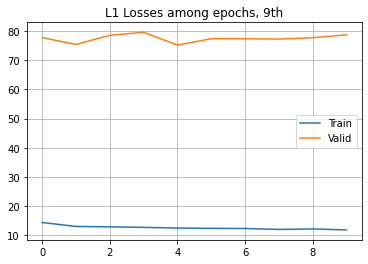

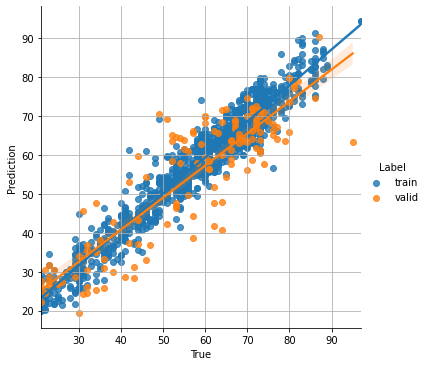

FOLD 1 / 5 - EPOCHS 11 / 100
BEST MAE 6.973
MAE  :: [TRAIN] 2.799   | [VALID] 7.011
MSE  :: [TRAIN] 11.812 | [VALID] 76.030
RMSE :: [TRAIN] 2.994  | [VALID] 8.523
CORR :: [TRAIN] 0.967 | [VALID] 0.876

FOLD 1 / 5 - EPOCHS 12 / 100
BEST MAE 6.973
MAE  :: [TRAIN] 2.776   | [VALID] 7.094
FOLD 1 / 5 - EPOCHS 13 / 100
BEST MAE 6.973
MAE  :: [TRAIN] 2.769   | [VALID] 7.046
FOLD 1 / 5 - EPOCHS 14 / 100
BEST MAE 6.946
MAE  :: [TRAIN] 2.758   | [VALID] 6.946
FOLD 1 / 5 - EPOCHS 15 / 100
BEST MAE 6.946
MAE  :: [TRAIN] 2.739   | [VALID] 7.041
FOLD 1 / 5 - EPOCHS 16 / 100
BEST MAE 6.946
MAE  :: [TRAIN] 2.723   | [VALID] 7.006
MSE  :: [TRAIN] 11.281 | [VALID] 75.975
RMSE :: [TRAIN] 2.894  | [VALID] 8.520
CORR :: [TRAIN] 0.969 | [VALID] 0.877

FOLD 1 / 5 - EPOCHS 17 / 100
BEST MAE 6.946
MAE  :: [TRAIN] 2.720   | [VALID] 6.974
FOLD 1 / 5 - EPOCHS 18 / 100
BEST MAE 6.946
MAE  :: [TRAIN] 2.708   | [VALID] 6.996
FOLD 1 / 5 - EPOCHS 19 / 100
BEST MAE 6.863
MAE  :: [TRAIN] 2.700   | [VALID] 6.863
FOLD 1 /

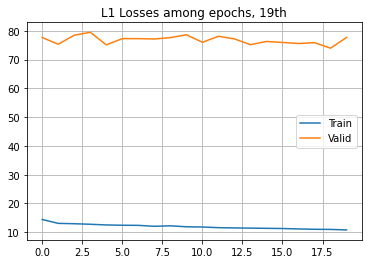

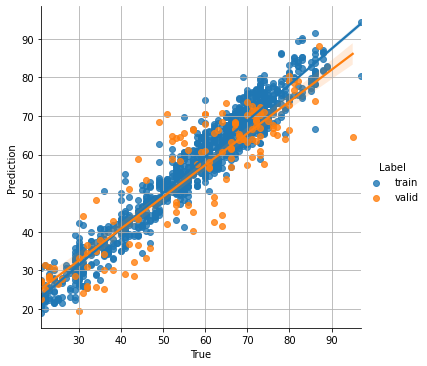

FOLD 1 / 5 - EPOCHS 21 / 100
BEST MAE 6.863
MAE  :: [TRAIN] 2.675   | [VALID] 6.987
MSE  :: [TRAIN] 10.766 | [VALID] 75.571
RMSE :: [TRAIN] 2.819  | [VALID] 8.501
CORR :: [TRAIN] 0.970 | [VALID] 0.879

FOLD 1 / 5 - EPOCHS 22 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.665   | [VALID] 6.861
FOLD 1 / 5 - EPOCHS 23 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.657   | [VALID] 6.882
FOLD 1 / 5 - EPOCHS 24 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.639   | [VALID] 6.940
FOLD 1 / 5 - EPOCHS 25 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.634   | [VALID] 7.011
FOLD 1 / 5 - EPOCHS 26 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.617   | [VALID] 7.003
MSE  :: [TRAIN] 10.293 | [VALID] 77.395
RMSE :: [TRAIN] 2.747  | [VALID] 8.607
CORR :: [TRAIN] 0.972 | [VALID] 0.878

FOLD 1 / 5 - EPOCHS 27 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.615   | [VALID] 6.987
FOLD 1 / 5 - EPOCHS 28 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.607   | [VALID] 6.984
FOLD 1 / 5 - EPOCHS 29 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.594   | [VALID] 6.876
FOLD 1 /

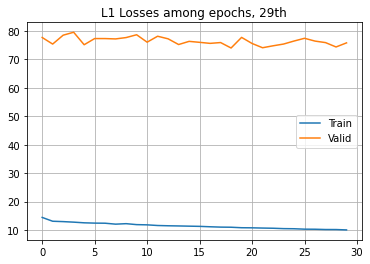

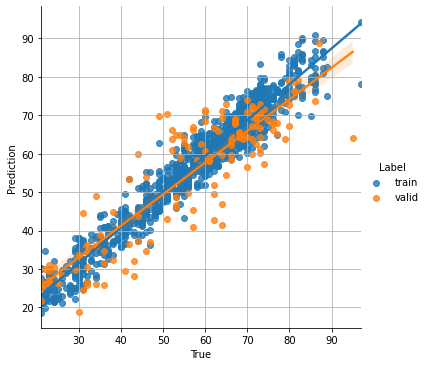

FOLD 1 / 5 - EPOCHS 31 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.569   | [VALID] 6.913
MSE  :: [TRAIN] 9.858 | [VALID] 74.706
RMSE :: [TRAIN] 2.693  | [VALID] 8.457
CORR :: [TRAIN] 0.970 | [VALID] 0.877

FOLD 1 / 5 - EPOCHS 32 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.558   | [VALID] 6.972
FOLD 1 / 5 - EPOCHS 33 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.542   | [VALID] 6.914
FOLD 1 / 5 - EPOCHS 34 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.533   | [VALID] 6.892
FOLD 1 / 5 - EPOCHS 35 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.530   | [VALID] 7.006
FOLD 1 / 5 - EPOCHS 36 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.511   | [VALID] 7.016
MSE  :: [TRAIN] 9.522 | [VALID] 76.490
RMSE :: [TRAIN] 2.638  | [VALID] 8.562
CORR :: [TRAIN] 0.970 | [VALID] 0.875

FOLD 1 / 5 - EPOCHS 37 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.513   | [VALID] 7.033
FOLD 1 / 5 - EPOCHS 38 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.501   | [VALID] 6.940
FOLD 1 / 5 - EPOCHS 39 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.489   | [VALID] 6.921
FOLD 1 / 5

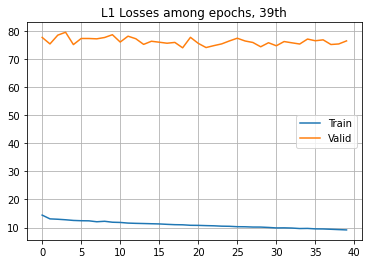

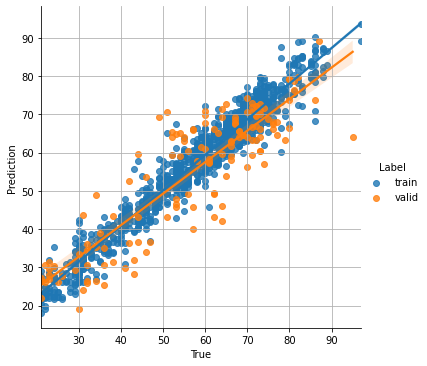

FOLD 1 / 5 - EPOCHS 41 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.473   | [VALID] 6.877
MSE  :: [TRAIN] 9.190 | [VALID] 74.526
RMSE :: [TRAIN] 2.605  | [VALID] 8.455
CORR :: [TRAIN] 0.973 | [VALID] 0.877

FOLD 1 / 5 - EPOCHS 42 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.455   | [VALID] 6.955
FOLD 1 / 5 - EPOCHS 43 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.438   | [VALID] 6.885
FOLD 1 / 5 - EPOCHS 44 / 100
BEST MAE 6.861
MAE  :: [TRAIN] 2.438   | [VALID] 6.940
FOLD 1 / 5 - EPOCHS 45 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.428   | [VALID] 6.837
FOLD 1 / 5 - EPOCHS 46 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.426   | [VALID] 6.865
MSE  :: [TRAIN] 8.894 | [VALID] 73.617
RMSE :: [TRAIN] 2.555  | [VALID] 8.404
CORR :: [TRAIN] 0.974 | [VALID] 0.879

FOLD 1 / 5 - EPOCHS 47 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.412   | [VALID] 7.021
FOLD 1 / 5 - EPOCHS 48 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.385   | [VALID] 7.025
FOLD 1 / 5 - EPOCHS 49 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.386   | [VALID] 6.957
FOLD 1 / 5

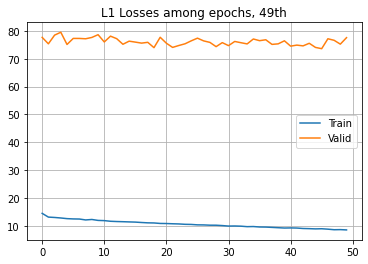

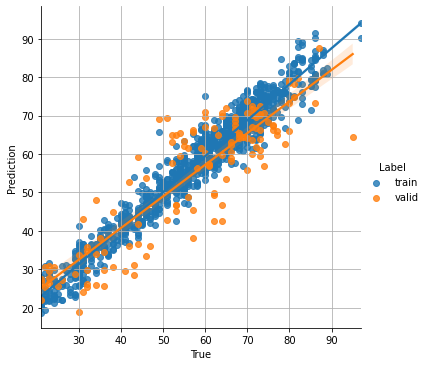

FOLD 1 / 5 - EPOCHS 51 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.379   | [VALID] 6.996
MSE  :: [TRAIN] 8.487 | [VALID] 76.430
RMSE :: [TRAIN] 2.491  | [VALID] 8.562
CORR :: [TRAIN] 0.974 | [VALID] 0.878

FOLD 1 / 5 - EPOCHS 52 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.375   | [VALID] 6.939
FOLD 1 / 5 - EPOCHS 53 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.344   | [VALID] 6.971
FOLD 1 / 5 - EPOCHS 54 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.343   | [VALID] 7.071
FOLD 1 / 5 - EPOCHS 55 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.325   | [VALID] 6.939
FOLD 1 / 5 - EPOCHS 56 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.318   | [VALID] 6.914
MSE  :: [TRAIN] 8.044 | [VALID] 73.514
RMSE :: [TRAIN] 2.428  | [VALID] 8.409
CORR :: [TRAIN] 0.976 | [VALID] 0.879

FOLD 1 / 5 - EPOCHS 57 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.302   | [VALID] 6.867
FOLD 1 / 5 - EPOCHS 58 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.296   | [VALID] 6.956
FOLD 1 / 5 - EPOCHS 59 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.289   | [VALID] 7.165
FOLD 1 / 5

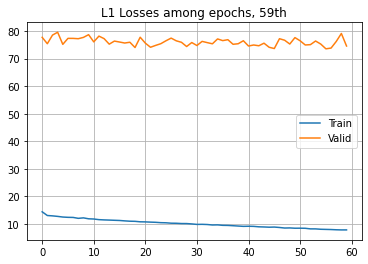

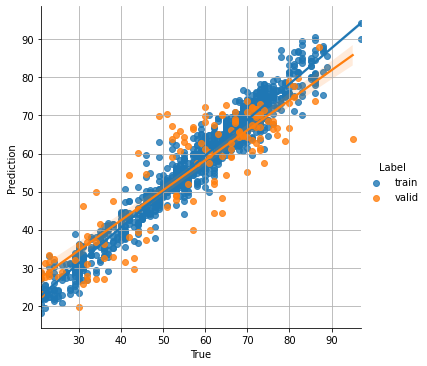

FOLD 1 / 5 - EPOCHS 61 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.268   | [VALID] 6.967
MSE  :: [TRAIN] 7.721 | [VALID] 75.292
RMSE :: [TRAIN] 2.373  | [VALID] 8.509
CORR :: [TRAIN] 0.977 | [VALID] 0.875

FOLD 1 / 5 - EPOCHS 62 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.263   | [VALID] 6.940
FOLD 1 / 5 - EPOCHS 63 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.246   | [VALID] 7.023
FOLD 1 / 5 - EPOCHS 64 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.246   | [VALID] 7.008
FOLD 1 / 5 - EPOCHS 65 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.225   | [VALID] 6.928
FOLD 1 / 5 - EPOCHS 66 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.199   | [VALID] 6.955
MSE  :: [TRAIN] 7.346 | [VALID] 74.847
RMSE :: [TRAIN] 2.323  | [VALID] 8.488
CORR :: [TRAIN] 0.978 | [VALID] 0.876

FOLD 1 / 5 - EPOCHS 67 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.211   | [VALID] 7.056
FOLD 1 / 5 - EPOCHS 68 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.198   | [VALID] 6.954
FOLD 1 / 5 - EPOCHS 69 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.203   | [VALID] 6.929
FOLD 1 / 5

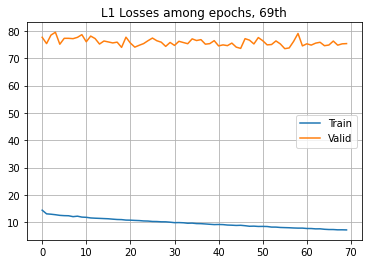

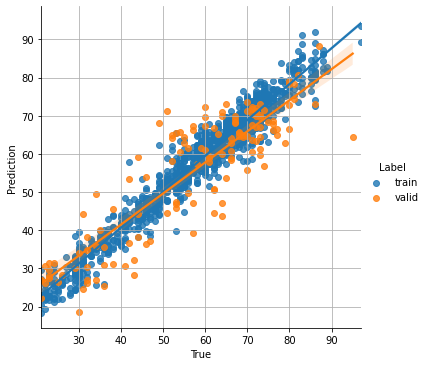

FOLD 1 / 5 - EPOCHS 71 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.176   | [VALID] 6.935
MSE  :: [TRAIN] 7.132 | [VALID] 74.910
RMSE :: [TRAIN] 2.286  | [VALID] 8.486
CORR :: [TRAIN] 0.978 | [VALID] 0.878

FOLD 1 / 5 - EPOCHS 72 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.158   | [VALID] 6.917
FOLD 1 / 5 - EPOCHS 73 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.152   | [VALID] 6.938
FOLD 1 / 5 - EPOCHS 74 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.129   | [VALID] 6.885
FOLD 1 / 5 - EPOCHS 75 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.124   | [VALID] 6.955
FOLD 1 / 5 - EPOCHS 76 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.105   | [VALID] 6.887
MSE  :: [TRAIN] 6.682 | [VALID] 74.196
RMSE :: [TRAIN] 2.214  | [VALID] 8.439
CORR :: [TRAIN] 0.977 | [VALID] 0.879

FOLD 1 / 5 - EPOCHS 77 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.111   | [VALID] 6.966
FOLD 1 / 5 - EPOCHS 78 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.102   | [VALID] 6.961
FOLD 1 / 5 - EPOCHS 79 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.085   | [VALID] 6.900
FOLD 1 / 5

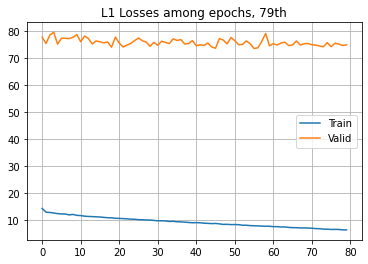

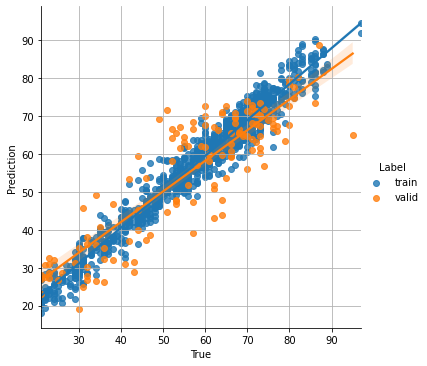

FOLD 1 / 5 - EPOCHS 81 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.070   | [VALID] 7.005
MSE  :: [TRAIN] 6.452 | [VALID] 76.444
RMSE :: [TRAIN] 2.170  | [VALID] 8.571
CORR :: [TRAIN] 0.979 | [VALID] 0.880

FOLD 1 / 5 - EPOCHS 82 / 100
BEST MAE 6.837
MAE  :: [TRAIN] 2.061   | [VALID] 6.890
FOLD 1 / 5 - EPOCHS 83 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 2.065   | [VALID] 6.825
FOLD 1 / 5 - EPOCHS 84 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 2.040   | [VALID] 7.019
FOLD 1 / 5 - EPOCHS 85 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 2.021   | [VALID] 6.911
FOLD 1 / 5 - EPOCHS 86 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 2.037   | [VALID] 6.973
MSE  :: [TRAIN] 6.254 | [VALID] 75.729
RMSE :: [TRAIN] 2.142  | [VALID] 8.532
CORR :: [TRAIN] 0.980 | [VALID] 0.877

FOLD 1 / 5 - EPOCHS 87 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 2.014   | [VALID] 6.973
FOLD 1 / 5 - EPOCHS 88 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 1.997   | [VALID] 6.844
FOLD 1 / 5 - EPOCHS 89 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 1.983   | [VALID] 6.889
FOLD 1 / 5

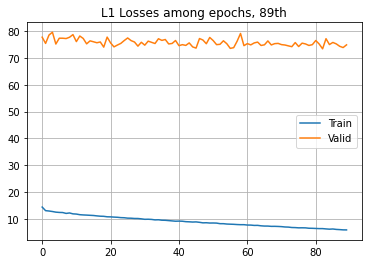

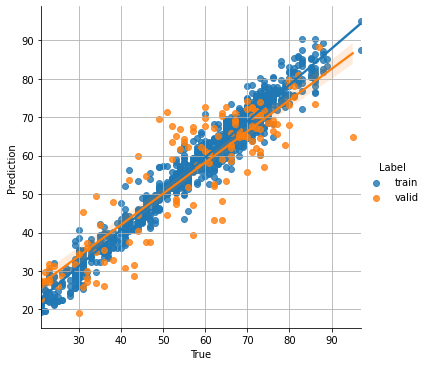

FOLD 1 / 5 - EPOCHS 91 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 1.964   | [VALID] 6.871
MSE  :: [TRAIN] 5.828 | [VALID] 73.931
RMSE :: [TRAIN] 2.063  | [VALID] 8.432
CORR :: [TRAIN] 0.979 | [VALID] 0.878

FOLD 1 / 5 - EPOCHS 92 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 1.959   | [VALID] 6.977
FOLD 1 / 5 - EPOCHS 93 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 1.962   | [VALID] 6.908
FOLD 1 / 5 - EPOCHS 94 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 1.946   | [VALID] 6.909
FOLD 1 / 5 - EPOCHS 95 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 1.926   | [VALID] 6.975
FOLD 1 / 5 - EPOCHS 96 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 1.923   | [VALID] 6.933
MSE  :: [TRAIN] 5.627 | [VALID] 74.735
RMSE :: [TRAIN] 2.036  | [VALID] 8.479
CORR :: [TRAIN] 0.979 | [VALID] 0.878

FOLD 1 / 5 - EPOCHS 97 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 1.912   | [VALID] 6.885
FOLD 1 / 5 - EPOCHS 98 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 1.929   | [VALID] 6.953
FOLD 1 / 5 - EPOCHS 99 / 100
BEST MAE 6.825
MAE  :: [TRAIN] 1.898   | [VALID] 6.967
FOLD 1 / 5

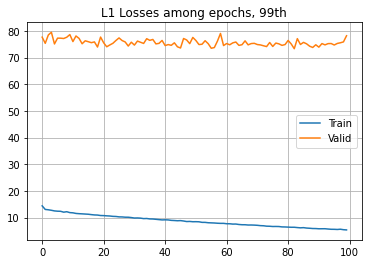

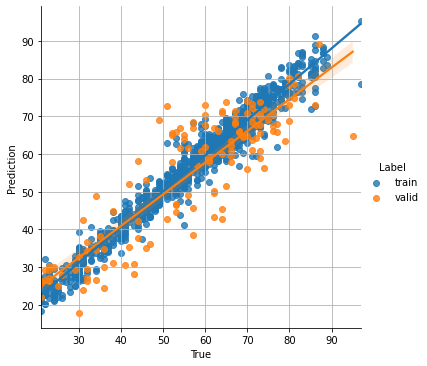

FOLD 0MSE  :: [TEST] 78.953
MAE  :: [TEST] 7.170
RMSE :: [TEST] 8.833
CORR :: [TEST] 0.842


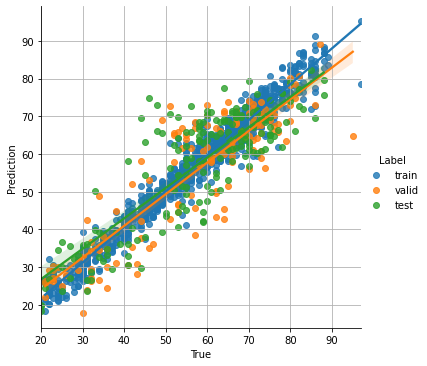

Model Resnet is selected.
FOLD 2 / 5 - EPOCHS 1 / 100
BEST MAE 7.097
MAE  :: [TRAIN] 2.937   | [VALID] 7.097
MSE  :: [TRAIN] 13.110 | [VALID] 81.730
RMSE :: [TRAIN] 3.324  | [VALID] 8.925
CORR :: [TRAIN] 0.966 | [VALID] 0.873

FOLD 2 / 5 - EPOCHS 2 / 100
BEST MAE 6.693
MAE  :: [TRAIN] 2.766   | [VALID] 6.693
FOLD 2 / 5 - EPOCHS 3 / 100
BEST MAE 6.693
MAE  :: [TRAIN] 2.720   | [VALID] 6.951
FOLD 2 / 5 - EPOCHS 4 / 100
BEST MAE 6.693
MAE  :: [TRAIN] 2.676   | [VALID] 6.775
FOLD 2 / 5 - EPOCHS 5 / 100
BEST MAE 6.641
MAE  :: [TRAIN] 2.655   | [VALID] 6.641
FOLD 2 / 5 - EPOCHS 6 / 100
BEST MAE 6.641
MAE  :: [TRAIN] 2.611   | [VALID] 6.688
MSE  :: [TRAIN] 10.203 | [VALID] 70.856
RMSE :: [TRAIN] 2.837  | [VALID] 8.321
CORR :: [TRAIN] 0.968 | [VALID] 0.878

FOLD 2 / 5 - EPOCHS 7 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.625   | [VALID] 6.636
FOLD 2 / 5 - EPOCHS 8 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.597   | [VALID] 6.979
FOLD 2 / 5 - EPOCHS 9 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.573   | [VALI

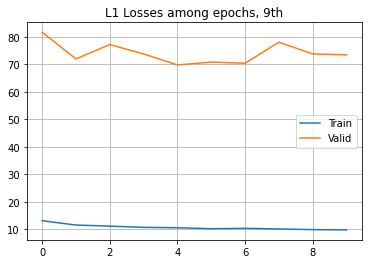

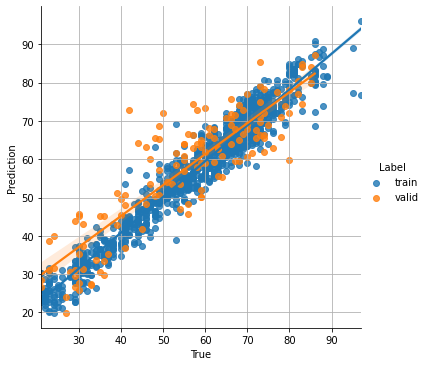

FOLD 2 / 5 - EPOCHS 11 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.538   | [VALID] 6.735
MSE  :: [TRAIN] 9.631 | [VALID] 72.228
RMSE :: [TRAIN] 2.741  | [VALID] 8.404
CORR :: [TRAIN] 0.972 | [VALID] 0.879

FOLD 2 / 5 - EPOCHS 12 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.536   | [VALID] 7.004
FOLD 2 / 5 - EPOCHS 13 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.521   | [VALID] 6.793
FOLD 2 / 5 - EPOCHS 14 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.480   | [VALID] 6.934
FOLD 2 / 5 - EPOCHS 15 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.480   | [VALID] 6.925
FOLD 2 / 5 - EPOCHS 16 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.470   | [VALID] 6.824
MSE  :: [TRAIN] 9.168 | [VALID] 74.394
RMSE :: [TRAIN] 2.643  | [VALID] 8.520
CORR :: [TRAIN] 0.973 | [VALID] 0.874

FOLD 2 / 5 - EPOCHS 17 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.439   | [VALID] 6.894
FOLD 2 / 5 - EPOCHS 18 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.451   | [VALID] 6.887
FOLD 2 / 5 - EPOCHS 19 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.435   | [VALID] 6.755
FOLD 2 / 5

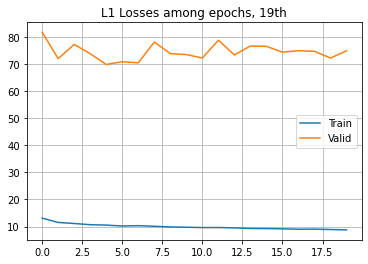

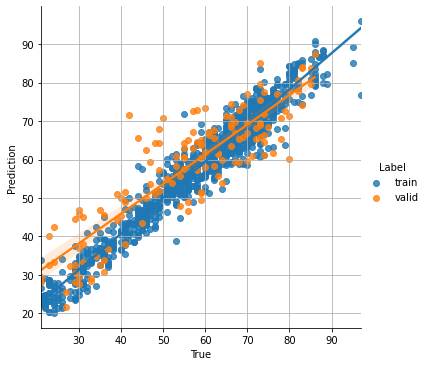

FOLD 2 / 5 - EPOCHS 21 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.412   | [VALID] 6.639
MSE  :: [TRAIN] 8.766 | [VALID] 69.876
RMSE :: [TRAIN] 2.594  | [VALID] 8.270
CORR :: [TRAIN] 0.973 | [VALID] 0.881

FOLD 2 / 5 - EPOCHS 22 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.383   | [VALID] 6.762
FOLD 2 / 5 - EPOCHS 23 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.379   | [VALID] 6.933
FOLD 2 / 5 - EPOCHS 24 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.379   | [VALID] 6.815
FOLD 2 / 5 - EPOCHS 25 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.368   | [VALID] 6.952
FOLD 2 / 5 - EPOCHS 26 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.372   | [VALID] 6.821
MSE  :: [TRAIN] 8.452 | [VALID] 73.873
RMSE :: [TRAIN] 2.537  | [VALID] 8.493
CORR :: [TRAIN] 0.975 | [VALID] 0.875

FOLD 2 / 5 - EPOCHS 27 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.341   | [VALID] 7.032
FOLD 2 / 5 - EPOCHS 28 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.352   | [VALID] 6.742
FOLD 2 / 5 - EPOCHS 29 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.325   | [VALID] 6.824
FOLD 2 / 5

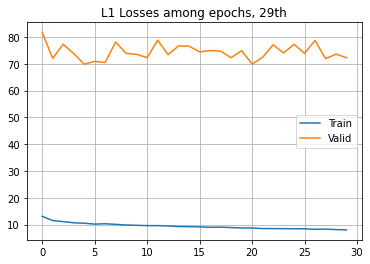

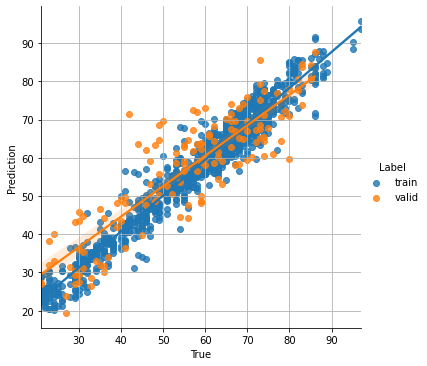

FOLD 2 / 5 - EPOCHS 31 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.297   | [VALID] 6.872
MSE  :: [TRAIN] 7.989 | [VALID] 74.769
RMSE :: [TRAIN] 2.458  | [VALID] 8.537
CORR :: [TRAIN] 0.977 | [VALID] 0.874

FOLD 2 / 5 - EPOCHS 32 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.299   | [VALID] 6.688
FOLD 2 / 5 - EPOCHS 33 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.292   | [VALID] 6.893
FOLD 2 / 5 - EPOCHS 34 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.270   | [VALID] 6.871
FOLD 2 / 5 - EPOCHS 35 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.251   | [VALID] 6.826
FOLD 2 / 5 - EPOCHS 36 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.250   | [VALID] 6.739
MSE  :: [TRAIN] 7.687 | [VALID] 71.756
RMSE :: [TRAIN] 2.398  | [VALID] 8.363
CORR :: [TRAIN] 0.973 | [VALID] 0.879

FOLD 2 / 5 - EPOCHS 37 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.236   | [VALID] 7.088
FOLD 2 / 5 - EPOCHS 38 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.251   | [VALID] 6.897
FOLD 2 / 5 - EPOCHS 39 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.240   | [VALID] 6.844
FOLD 2 / 5

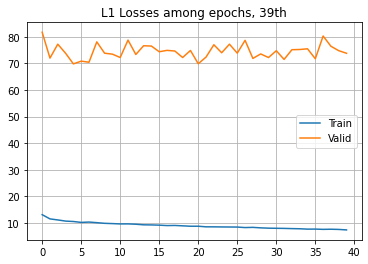

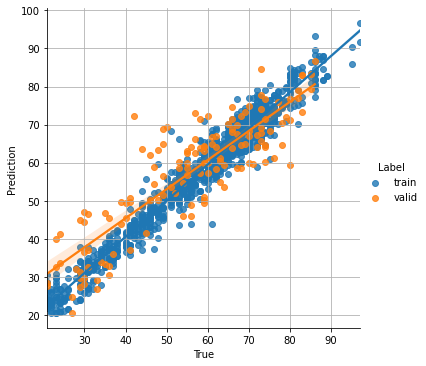

FOLD 2 / 5 - EPOCHS 41 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.251   | [VALID] 7.251
MSE  :: [TRAIN] 7.584 | [VALID] 82.995
RMSE :: [TRAIN] 2.415  | [VALID] 8.983
CORR :: [TRAIN] 0.976 | [VALID] 0.870

FOLD 2 / 5 - EPOCHS 42 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.215   | [VALID] 6.744
FOLD 2 / 5 - EPOCHS 43 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.163   | [VALID] 6.819
FOLD 2 / 5 - EPOCHS 44 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.177   | [VALID] 6.928
FOLD 2 / 5 - EPOCHS 45 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.155   | [VALID] 6.929
FOLD 2 / 5 - EPOCHS 46 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.187   | [VALID] 7.057
MSE  :: [TRAIN] 7.150 | [VALID] 78.073
RMSE :: [TRAIN] 2.332  | [VALID] 8.706
CORR :: [TRAIN] 0.975 | [VALID] 0.870

FOLD 2 / 5 - EPOCHS 47 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.175   | [VALID] 6.874
FOLD 2 / 5 - EPOCHS 48 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.142   | [VALID] 7.152
FOLD 2 / 5 - EPOCHS 49 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.120   | [VALID] 6.737
FOLD 2 / 5

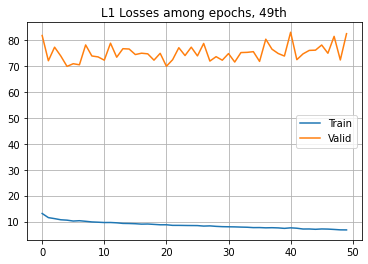

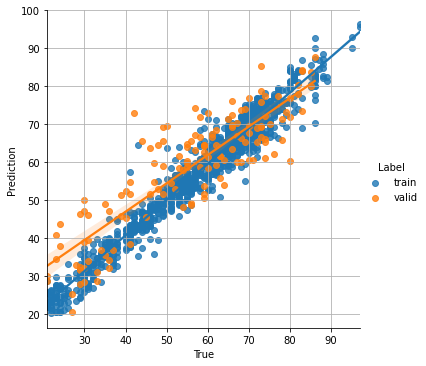

FOLD 2 / 5 - EPOCHS 51 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.126   | [VALID] 6.977
MSE  :: [TRAIN] 6.787 | [VALID] 77.379
RMSE :: [TRAIN] 2.256  | [VALID] 8.676
CORR :: [TRAIN] 0.978 | [VALID] 0.872

FOLD 2 / 5 - EPOCHS 52 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.127   | [VALID] 6.955
FOLD 2 / 5 - EPOCHS 53 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.119   | [VALID] 6.987
FOLD 2 / 5 - EPOCHS 54 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.107   | [VALID] 7.156
FOLD 2 / 5 - EPOCHS 55 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.079   | [VALID] 6.826
FOLD 2 / 5 - EPOCHS 56 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.064   | [VALID] 6.852
MSE  :: [TRAIN] 6.457 | [VALID] 76.126
RMSE :: [TRAIN] 2.190  | [VALID] 8.612
CORR :: [TRAIN] 0.976 | [VALID] 0.874

FOLD 2 / 5 - EPOCHS 57 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.050   | [VALID] 7.015
FOLD 2 / 5 - EPOCHS 58 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.061   | [VALID] 6.725
FOLD 2 / 5 - EPOCHS 59 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.031   | [VALID] 6.730
FOLD 2 / 5

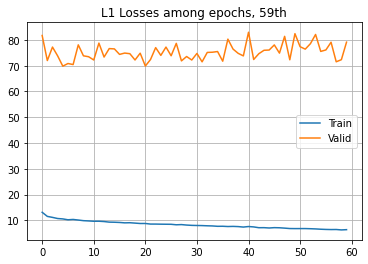

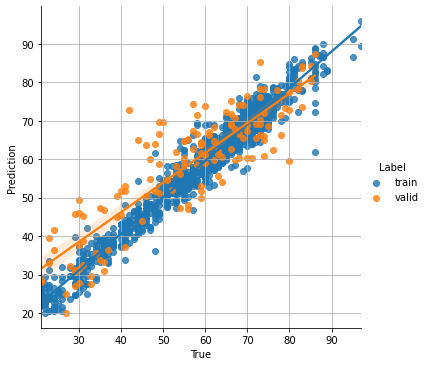

FOLD 2 / 5 - EPOCHS 61 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.030   | [VALID] 6.676
MSE  :: [TRAIN] 6.273 | [VALID] 71.110
RMSE :: [TRAIN] 2.155  | [VALID] 8.338
CORR :: [TRAIN] 0.980 | [VALID] 0.878

FOLD 2 / 5 - EPOCHS 62 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 2.000   | [VALID] 6.981
FOLD 2 / 5 - EPOCHS 63 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 1.998   | [VALID] 6.743
FOLD 2 / 5 - EPOCHS 64 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 1.977   | [VALID] 6.892
FOLD 2 / 5 - EPOCHS 65 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 1.957   | [VALID] 6.802
FOLD 2 / 5 - EPOCHS 66 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 1.948   | [VALID] 7.038
MSE  :: [TRAIN] 5.807 | [VALID] 79.825
RMSE :: [TRAIN] 2.058  | [VALID] 8.811
CORR :: [TRAIN] 0.979 | [VALID] 0.875

FOLD 2 / 5 - EPOCHS 67 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 1.970   | [VALID] 6.825
FOLD 2 / 5 - EPOCHS 68 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 1.984   | [VALID] 7.178
FOLD 2 / 5 - EPOCHS 69 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 1.935   | [VALID] 7.128
FOLD 2 / 5

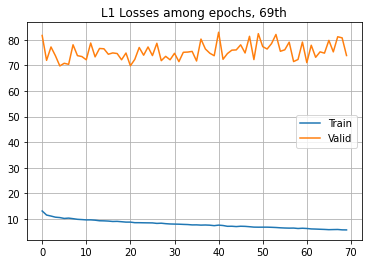

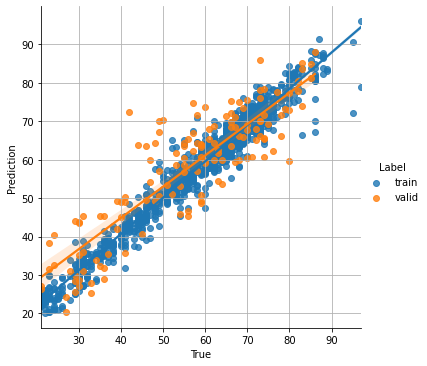

FOLD 2 / 5 - EPOCHS 71 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 1.922   | [VALID] 6.926
MSE  :: [TRAIN] 5.610 | [VALID] 76.087
RMSE :: [TRAIN] 2.034  | [VALID] 8.596
CORR :: [TRAIN] 0.979 | [VALID] 0.873

FOLD 2 / 5 - EPOCHS 72 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 1.906   | [VALID] 6.828
FOLD 2 / 5 - EPOCHS 73 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 1.912   | [VALID] 6.775
FOLD 2 / 5 - EPOCHS 74 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 1.905   | [VALID] 7.045
FOLD 2 / 5 - EPOCHS 75 / 100
BEST MAE 6.636
MAE  :: [TRAIN] 1.902   | [VALID] 6.985
FOLD 2 / 5 - EPOCHS 76 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.888   | [VALID] 6.633
MSE  :: [TRAIN] 5.394 | [VALID] 71.707
RMSE :: [TRAIN] 2.003  | [VALID] 8.370
CORR :: [TRAIN] 0.979 | [VALID] 0.877

FOLD 2 / 5 - EPOCHS 77 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.868   | [VALID] 6.959
FOLD 2 / 5 - EPOCHS 78 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.881   | [VALID] 6.887
FOLD 2 / 5 - EPOCHS 79 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.833   | [VALID] 6.860
FOLD 2 / 5

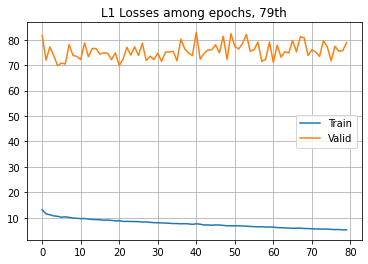

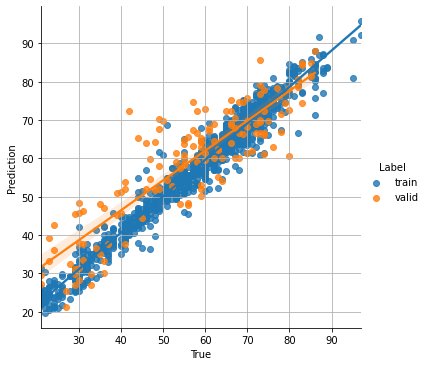

FOLD 2 / 5 - EPOCHS 81 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.827   | [VALID] 6.710
MSE  :: [TRAIN] 5.064 | [VALID] 73.317
RMSE :: [TRAIN] 1.925  | [VALID] 8.462
CORR :: [TRAIN] 0.980 | [VALID] 0.876

FOLD 2 / 5 - EPOCHS 82 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.822   | [VALID] 6.690
FOLD 2 / 5 - EPOCHS 83 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.798   | [VALID] 6.772
FOLD 2 / 5 - EPOCHS 84 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.798   | [VALID] 6.652
FOLD 2 / 5 - EPOCHS 85 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.814   | [VALID] 6.979
FOLD 2 / 5 - EPOCHS 86 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.764   | [VALID] 6.827
MSE  :: [TRAIN] 4.809 | [VALID] 74.761
RMSE :: [TRAIN] 1.876  | [VALID] 8.532
CORR :: [TRAIN] 0.982 | [VALID] 0.876

FOLD 2 / 5 - EPOCHS 87 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.763   | [VALID] 6.785
FOLD 2 / 5 - EPOCHS 88 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.783   | [VALID] 6.769
FOLD 2 / 5 - EPOCHS 89 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.756   | [VALID] 6.952
FOLD 2 / 5

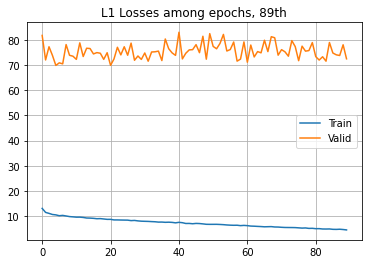

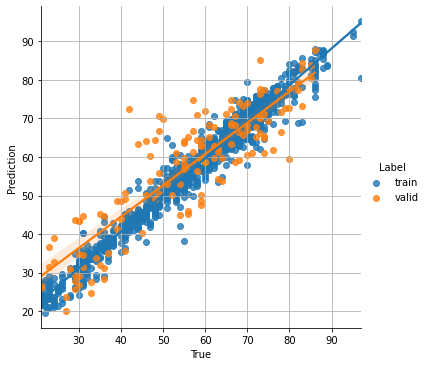

FOLD 2 / 5 - EPOCHS 91 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.729   | [VALID] 6.928
MSE  :: [TRAIN] 4.602 | [VALID] 77.831
RMSE :: [TRAIN] 1.836  | [VALID] 8.703
CORR :: [TRAIN] 0.981 | [VALID] 0.873

FOLD 2 / 5 - EPOCHS 92 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.726   | [VALID] 6.831
FOLD 2 / 5 - EPOCHS 93 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.703   | [VALID] 6.830
FOLD 2 / 5 - EPOCHS 94 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.707   | [VALID] 6.719
FOLD 2 / 5 - EPOCHS 95 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.693   | [VALID] 6.891
FOLD 2 / 5 - EPOCHS 96 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.727   | [VALID] 6.750
MSE  :: [TRAIN] 4.599 | [VALID] 74.277
RMSE :: [TRAIN] 1.867  | [VALID] 8.515
CORR :: [TRAIN] 0.983 | [VALID] 0.877

FOLD 2 / 5 - EPOCHS 97 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.674   | [VALID] 6.726
FOLD 2 / 5 - EPOCHS 98 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.676   | [VALID] 6.766
FOLD 2 / 5 - EPOCHS 99 / 100
BEST MAE 6.633
MAE  :: [TRAIN] 1.689   | [VALID] 7.019
FOLD 2 / 5

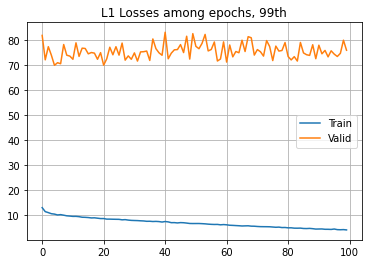

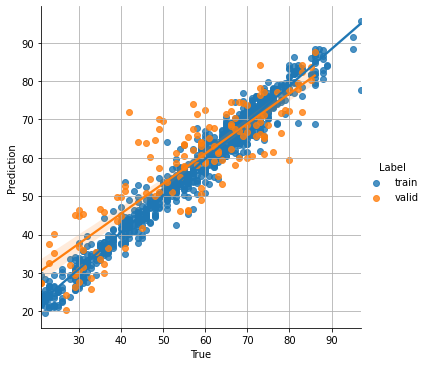

FOLD 1MSE  :: [TEST] 67.252
MAE  :: [TEST] 6.452
RMSE :: [TEST] 8.117
CORR :: [TEST] 0.862


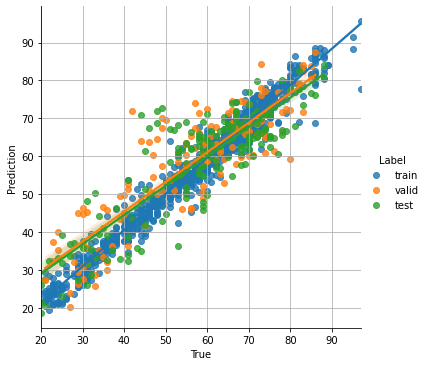

Model Resnet is selected.
FOLD 3 / 5 - EPOCHS 1 / 100
BEST MAE 7.613
MAE  :: [TRAIN] 2.873   | [VALID] 7.613
MSE  :: [TRAIN] 12.976 | [VALID] 88.377
RMSE :: [TRAIN] 3.247  | [VALID] 9.263
CORR :: [TRAIN] 0.968 | [VALID] 0.832

FOLD 3 / 5 - EPOCHS 2 / 100
BEST MAE 7.393
MAE  :: [TRAIN] 2.737   | [VALID] 7.393
FOLD 3 / 5 - EPOCHS 3 / 100
BEST MAE 7.281
MAE  :: [TRAIN] 2.679   | [VALID] 7.281
FOLD 3 / 5 - EPOCHS 4 / 100
BEST MAE 7.281
MAE  :: [TRAIN] 2.691   | [VALID] 7.474
FOLD 3 / 5 - EPOCHS 5 / 100
BEST MAE 7.281
MAE  :: [TRAIN] 2.630   | [VALID] 7.338
FOLD 3 / 5 - EPOCHS 6 / 100
BEST MAE 7.281
MAE  :: [TRAIN] 2.578   | [VALID] 7.289
MSE  :: [TRAIN] 10.482 | [VALID] 83.291
RMSE :: [TRAIN] 2.796  | [VALID] 8.984
CORR :: [TRAIN] 0.971 | [VALID] 0.841

FOLD 3 / 5 - EPOCHS 7 / 100
BEST MAE 7.266
MAE  :: [TRAIN] 2.599   | [VALID] 7.266
FOLD 3 / 5 - EPOCHS 8 / 100
BEST MAE 7.266
MAE  :: [TRAIN] 2.567   | [VALID] 7.286
FOLD 3 / 5 - EPOCHS 9 / 100
BEST MAE 7.266
MAE  :: [TRAIN] 2.551   | [VALI

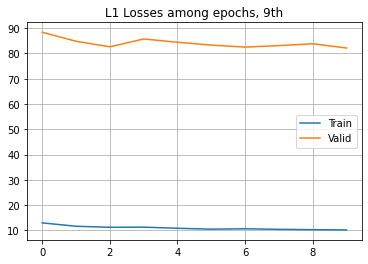

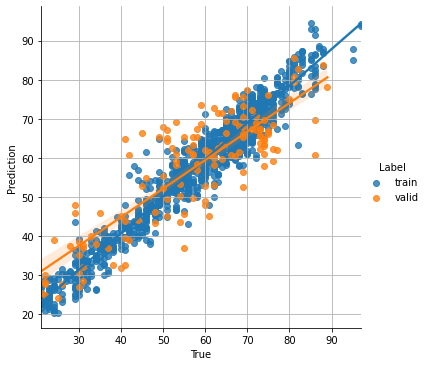

FOLD 3 / 5 - EPOCHS 11 / 100
BEST MAE 7.266
MAE  :: [TRAIN] 2.527   | [VALID] 7.394
MSE  :: [TRAIN] 10.126 | [VALID] 84.565
RMSE :: [TRAIN] 2.723  | [VALID] 9.038
CORR :: [TRAIN] 0.973 | [VALID] 0.838

FOLD 3 / 5 - EPOCHS 12 / 100
BEST MAE 7.266
MAE  :: [TRAIN] 2.556   | [VALID] 7.299
FOLD 3 / 5 - EPOCHS 13 / 100
BEST MAE 7.266
MAE  :: [TRAIN] 2.525   | [VALID] 7.292
FOLD 3 / 5 - EPOCHS 14 / 100
BEST MAE 7.266
MAE  :: [TRAIN] 2.521   | [VALID] 7.318
FOLD 3 / 5 - EPOCHS 15 / 100
BEST MAE 7.194
MAE  :: [TRAIN] 2.466   | [VALID] 7.194
FOLD 3 / 5 - EPOCHS 16 / 100
BEST MAE 7.194
MAE  :: [TRAIN] 2.473   | [VALID] 7.270
MSE  :: [TRAIN] 9.766 | [VALID] 82.190
RMSE :: [TRAIN] 2.658  | [VALID] 8.913
CORR :: [TRAIN] 0.970 | [VALID] 0.843

FOLD 3 / 5 - EPOCHS 17 / 100
BEST MAE 7.194
MAE  :: [TRAIN] 2.452   | [VALID] 7.247
FOLD 3 / 5 - EPOCHS 18 / 100
BEST MAE 7.192
MAE  :: [TRAIN] 2.451   | [VALID] 7.192
FOLD 3 / 5 - EPOCHS 19 / 100
BEST MAE 7.170
MAE  :: [TRAIN] 2.451   | [VALID] 7.170
FOLD 3 / 

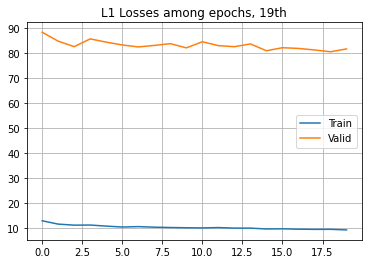

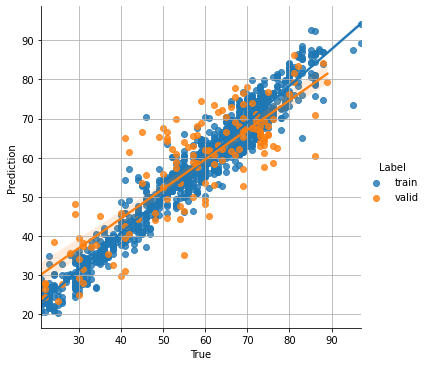

FOLD 3 / 5 - EPOCHS 21 / 100
BEST MAE 7.157
MAE  :: [TRAIN] 2.408   | [VALID] 7.157
MSE  :: [TRAIN] 9.257 | [VALID] 80.962
RMSE :: [TRAIN] 2.563  | [VALID] 8.844
CORR :: [TRAIN] 0.974 | [VALID] 0.845

FOLD 3 / 5 - EPOCHS 22 / 100
BEST MAE 7.157
MAE  :: [TRAIN] 2.401   | [VALID] 7.427
FOLD 3 / 5 - EPOCHS 23 / 100
BEST MAE 7.157
MAE  :: [TRAIN] 2.432   | [VALID] 7.167
FOLD 3 / 5 - EPOCHS 24 / 100
BEST MAE 7.157
MAE  :: [TRAIN] 2.389   | [VALID] 7.297
FOLD 3 / 5 - EPOCHS 25 / 100
BEST MAE 7.157
MAE  :: [TRAIN] 2.407   | [VALID] 7.240
FOLD 3 / 5 - EPOCHS 26 / 100
BEST MAE 7.157
MAE  :: [TRAIN] 2.386   | [VALID] 7.201
MSE  :: [TRAIN] 9.095 | [VALID] 81.041
RMSE :: [TRAIN] 2.553  | [VALID] 8.851
CORR :: [TRAIN] 0.975 | [VALID] 0.844

FOLD 3 / 5 - EPOCHS 27 / 100
BEST MAE 7.157
MAE  :: [TRAIN] 2.381   | [VALID] 7.313
FOLD 3 / 5 - EPOCHS 28 / 100
BEST MAE 7.137
MAE  :: [TRAIN] 2.359   | [VALID] 7.137
FOLD 3 / 5 - EPOCHS 29 / 100
BEST MAE 7.137
MAE  :: [TRAIN] 2.374   | [VALID] 7.239
FOLD 3 / 5

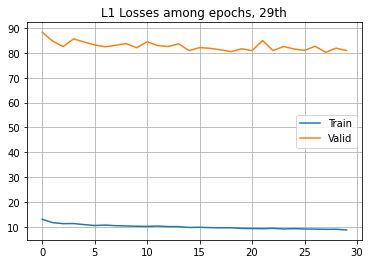

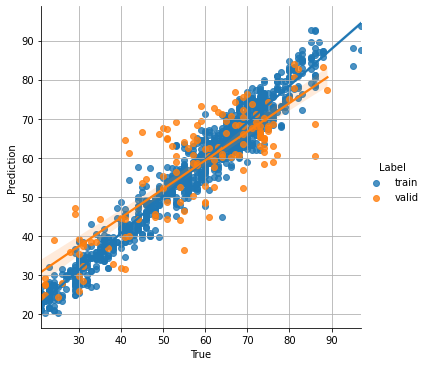

FOLD 3 / 5 - EPOCHS 31 / 100
BEST MAE 7.137
MAE  :: [TRAIN] 2.327   | [VALID] 7.186
MSE  :: [TRAIN] 8.726 | [VALID] 81.728
RMSE :: [TRAIN] 2.482  | [VALID] 8.884
CORR :: [TRAIN] 0.975 | [VALID] 0.844

FOLD 3 / 5 - EPOCHS 32 / 100
BEST MAE 7.137
MAE  :: [TRAIN] 2.309   | [VALID] 7.313
FOLD 3 / 5 - EPOCHS 33 / 100
BEST MAE 7.137
MAE  :: [TRAIN] 2.308   | [VALID] 7.194
FOLD 3 / 5 - EPOCHS 34 / 100
BEST MAE 7.137
MAE  :: [TRAIN] 2.282   | [VALID] 7.314
FOLD 3 / 5 - EPOCHS 35 / 100
BEST MAE 7.137
MAE  :: [TRAIN] 2.287   | [VALID] 7.228
FOLD 3 / 5 - EPOCHS 36 / 100
BEST MAE 7.137
MAE  :: [TRAIN] 2.263   | [VALID] 7.291
MSE  :: [TRAIN] 8.332 | [VALID] 83.146
RMSE :: [TRAIN] 2.394  | [VALID] 8.962
CORR :: [TRAIN] 0.976 | [VALID] 0.841

FOLD 3 / 5 - EPOCHS 37 / 100
BEST MAE 7.137
MAE  :: [TRAIN] 2.284   | [VALID] 7.232
FOLD 3 / 5 - EPOCHS 38 / 100
BEST MAE 7.137
MAE  :: [TRAIN] 2.256   | [VALID] 7.168
FOLD 3 / 5 - EPOCHS 39 / 100
BEST MAE 7.137
MAE  :: [TRAIN] 2.263   | [VALID] 7.139
FOLD 3 / 5

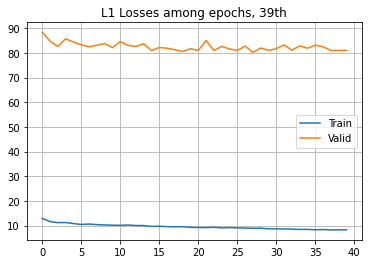

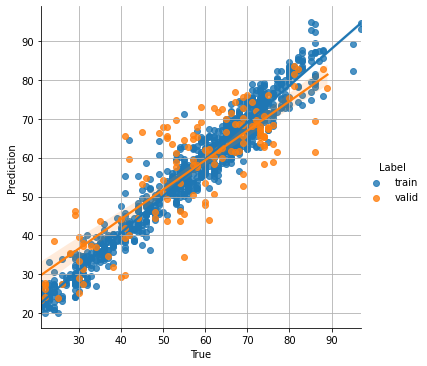

FOLD 3 / 5 - EPOCHS 41 / 100
BEST MAE 7.111
MAE  :: [TRAIN] 2.249   | [VALID] 7.197
MSE  :: [TRAIN] 8.215 | [VALID] 82.129
RMSE :: [TRAIN] 2.392  | [VALID] 8.919
CORR :: [TRAIN] 0.977 | [VALID] 0.843

FOLD 3 / 5 - EPOCHS 42 / 100
BEST MAE 7.111
MAE  :: [TRAIN] 2.221   | [VALID] 7.175
FOLD 3 / 5 - EPOCHS 43 / 100
BEST MAE 7.111
MAE  :: [TRAIN] 2.258   | [VALID] 7.237
FOLD 3 / 5 - EPOCHS 44 / 100
BEST MAE 7.111
MAE  :: [TRAIN] 2.225   | [VALID] 7.252
FOLD 3 / 5 - EPOCHS 45 / 100
BEST MAE 7.111
MAE  :: [TRAIN] 2.204   | [VALID] 7.267
FOLD 3 / 5 - EPOCHS 46 / 100
BEST MAE 7.111
MAE  :: [TRAIN] 2.205   | [VALID] 7.259
MSE  :: [TRAIN] 7.862 | [VALID] 82.281
RMSE :: [TRAIN] 2.330  | [VALID] 8.918
CORR :: [TRAIN] 0.977 | [VALID] 0.844

FOLD 3 / 5 - EPOCHS 47 / 100
BEST MAE 7.111
MAE  :: [TRAIN] 2.235   | [VALID] 7.142
FOLD 3 / 5 - EPOCHS 48 / 100
BEST MAE 7.111
MAE  :: [TRAIN] 2.229   | [VALID] 7.183


FileNotFoundError: [Errno 2] No such file or directory: '../../brainmask_tlrc\\reconV6_OAS1_0025_MR1-brainmask_tlrc.npy'

In [30]:
trn_fold_losses, tst_fold_losses = [], []
trn_fold_corrs, tst_fold_corrs = [], []

trn_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

val_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

tst_losses, tst_maes, tst_rmses = [], [], []
for fold in folds:
    
    best_mae = 10
    model_name = 'resnet'
    model, device = load_model(model_name, verbose=False)
    model = torch.load(models[fold])
    optimizer = optim.Adam(model.parameters(), lr=1e-5)
    
    trn_losses, val_losses = [], []
    trn_maes, val_maes = [], []
    trn_rmses, val_rmses = [], []
    
    aug_losses, aug_maes, aug_rmses = [], [], []
    
    for e in epochs:

        model, (trn_losses, trn_maes, trn_rmses), trn_preds = train(model, False, None, fold, resize, device, batch_size,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              trn_losses, trn_maes, trn_rmses,
                                                              optimizer, scheduler, lamb)
        
        model, (aug_losses, aug_maes, aug_rmses), aug_preds = train(model, False, True, fold, resize, device, batch_size,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              aug_losses, aug_maes, aug_rmses,
                                                              optimizer, scheduler, lamb)
        
        model, (val_losses, val_maes, val_rmses), val_preds =  eval(model, True, None, fold, resize, device, batch_size,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              val_losses, val_maes, val_rmses)

        if best_mae > val_maes[-1]:
            
            torch.save(model, f'./models/{model_name}_0120_{fold}_{e}_{val_maes[-1]}.pth')
            best_mae = val_maes[-1]
        
        # SUM UP RESLUTS
        trn_df = make_df(trn_preds, 'train')
        val_df = make_df(val_preds, 'valid')
        aug_df = make_df(aug_preds, 'train')
        reg_df = pd.concat([trn_df, val_df, aug_df], ignore_index=True)

        trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
        val_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

        
        print(f'FOLD {fold+1} / {folds.stop} - EPOCHS {e+1} / {epochs.stop}')
        print(f'BEST MAE {best_mae:.3f}')
        print(f'MAE  :: [TRAIN] {trn_maes[-1]:.3f}   | [VALID] {val_maes[-1]:.3f}')
        if e % 5 == 0:
            print(f'MSE  :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {val_losses[-1]:.3f}')
            print(f'RMSE :: [TRAIN] {trn_rmses[-1]:.3f}  | [VALID] {val_rmses[-1]:.3f}')
            print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {val_corr:.3f}\n')

        if e % 10 == 9:
            plt.title(f"L1 Losses among epochs, {e}th")
            plt.plot(trn_losses, label='Train')
            plt.plot(val_losses, label='Valid')
            plt.grid(); plt.legend()
            
            sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
            plt.grid()
            plt.show()
            

    trn_fold['MSE'].append(trn_losses)
    trn_fold['MAE'].append(trn_maes)
    trn_fold['RMSE'].append(trn_rmses)
    trn_fold['Correlation'].append(trn_corr)
    
    val_fold['MSE'].append(val_losses)
    val_fold['MAE'].append(val_maes)
    val_fold['RMSE'].append(val_rmses)
    val_fold['Correlation'].append(val_corr)
    
    # TEST
    test_dset = MyDataset(task_type='age', test=True)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    model, (tst_losses, tst_maes, tst_rmses), tst_preds = eval(model, True, None, None, resize, device, batch_size,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              tst_losses, tst_maes, tst_rmses)

    tst_df = make_df(tst_preds, 'test')
    reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

    tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
    
    print(f'FOLD {fold}', end='')
    print(f'MSE  :: [TEST] {tst_losses[-1]:.3f}')
    print(f'MAE  :: [TEST] {tst_maes[-1]:.3f}')
    print(f'RMSE :: [TEST] {tst_rmses[-1]:.3f}')
    print(f'CORR :: [TEST] {tst_corr:.3f}')
    
    torch.save(model, f'./models/{model_name}_{fold}_{e}_{tst_maes[-1]}.pth')

    sns_plot = sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
    plt.grid()
    plt.show()
    
    del model

    torch.cuda.empty_cache()

In [39]:
# Ensemble
preds = dict()
models = glob('./models/ensembles/*.pth')
for fold, state in enumerate(models):
    
    model, device = load_model('resnet', verbose=False)
    model = torch.load(state)
    
    model, (_, _, _), tst_preds = eval(model, True, None, None, resize, device, batch_size,
                                      loss_fn, mae_fn, rmse_fn,
                                      [], [], [])
    
    preds[f'model_{fold}'] = list(map(float, tst_preds[1]))
    
ensemble_results = pd.DataFrame(preds)
ensemble_results['Avg'] = ensemble_results.mean(axis=1)
ensemble_results['True'] = list(map(float, tst_preds[0]))

Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.


In [64]:
def result_plot(df):
    
    avg = torch.Tensor(ensemble_results['Avg'])
    tru = torch.Tensor(ensemble_results['True'])
    
    corr = ensemble_results.corr()['True']['Avg']
    mae_fn, rmse_fn = nn.L1Loss(), RMSELoss()
    
    print(f'Ensemble Results')
    print(f'MAE  = {float(mae_fn(avg, tru)):.3f}')
    print(f'RMSE = {float(rmse_fn(avg, tru)):.3f}')
    print(f'CORR = {corr:.3f}')
    
    sns.lmplot(data=ensemble_results, x='True', y='Avg')
    plt.grid()
    plt.show()

Ensemble Results
MAE  = 7.025
RMSE = 8.598
CORR = 0.854


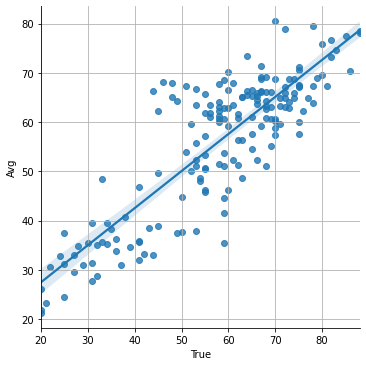

In [65]:
result_plot(ensemble_results)

### kFold Run

In [ ]:
# best_loss = 10

# trn_fold_losses, tst_fold_losses = [], []
# trn_fold_corrs, tst_fold_corrs = [], []

# trn_fold = {
#     'MSE': list(),
#     'MAE': list(),
#     'RMSE': list(),
#     'Correlation': list()
# }

# val_fold = {
#     'MSE': list(),
#     'MAE': list(),
#     'RMSE': list(),
#     'Correlation': list()
# }

# tst_losses, tst_maes, tst_rmses = [], [], []
# for fold in folds:
    
#     model_name = 'resnet'
#     model, device = load_model(model_name)
#     optimizer = optim.Adam(model.parameters(), lr=1e-4)
    
#     trn_losses, val_losses = [], []
#     trn_maes, val_maes = [], []
#     trn_rmses, val_rmses = [], []
    
#     aug_losses, aug_maes, aug_rmses = [], [], []
    
#     for e in epochs:

#         model, (trn_losses, trn_maes, trn_rmses), trn_preds = train(model, False, None, fold, resize, device,
#                                                               loss_fn, mae_fn, rmse_fn,
#                                                               trn_losses, trn_maes, trn_rmses,
#                                                               optimizer, scheduler, lamb)
        
#         model, (aug_losses, aug_maes, aug_rmses), aug_preds = train(model, False, True, fold, resize, device,
#                                                               loss_fn, mae_fn, rmse_fn,
#                                                               aug_losses, aug_maes, aug_rmses,
#                                                               optimizer, scheduler, lamb)
        
#         model, (val_losses, val_maes, val_rmses), val_preds =  eval(model, True, None, fold, resize, device,
#                                                               loss_fn, mae_fn, rmse_fn,
#                                                               val_losses, val_maes, val_rmses)


#         # SUM UP RESLUTS
#         trn_df = make_df(trn_preds, 'train')
#         val_df = make_df(val_preds, 'valid')
#         aug_df = make_df(aug_preds, 'train')
#         reg_df = pd.concat([trn_df, val_df, aug_df], ignore_index=True)

#         trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
#         val_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

        
#         print(f'FOLD {fold} - EPOCHS {e}')
#         print(f'MAE  :: [TRAIN] {trn_maes[-1]:.3f}   | [VALID] {val_maes[-1]:.3f}')
#         if e % 5 == 0:
#             print(f'MSE  :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {val_losses[-1]:.3f}')
#             print(f'RMSE :: [TRAIN] {trn_rmses[-1]:.3f}  | [VALID] {val_rmses[-1]:.3f}')
#             print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {val_corr:.3f}\n')

#         if e % 10 == 9:
#             plt.title(f"L1 Losses among epochs, {e}th")
#             plt.plot(trn_losses, label='Train')
#             plt.plot(val_losses, label='Valid')
#             plt.grid(); plt.legend()
            
#             sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
#             plt.grid()
#             plt.show()
    
#     torch.save(model, f'./models/{model_name}_1222_{fold}_{e}_{trn_losses[-1]}.pth')
    
#     trn_fold['MSE'].append(trn_losses)
#     trn_fold['MAE'].append(trn_maes)
#     trn_fold['RMSE'].append(trn_rmses)
#     trn_fold['Correlation'].append(trn_corr)
    
#     val_fold['MSE'].append(val_losses)
#     val_fold['MAE'].append(val_maes)
#     val_fold['RMSE'].append(val_rmses)
#     val_fold['Correlation'].append(val_corr)
    
#     # TEST
#     test_dset = MyDataset(task_type='age', test=True)
#     test_loader = DataLoader(test_dset, batch_size=8)
    
#     model, (tst_losses, tst_maes, tst_rmses), tst_preds = eval(model, test_loader, resize, device,
#                                                               loss_fn, mae_fn, rmse_fn,
#                                                               tst_losses, tst_maes, tst_rmses)

#     tst_df = make_df(tst_preds, 'test')
#     reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

#     tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
    
#     print(f'FOLD {fold}', end='')
#     print(f'MSE  :: [TEST] {tst_losses[-1]:.3f}')
#     print(f'MAE  :: [TEST] {tst_maes[-1]:.3f}')
#     print(f'RMSE :: [TEST] {tst_rmses[-1]:.3f}')
#     print(f'CORR :: [TEST] {tst_corr:.3f}')
    
#     torch.save(model, f'./models/{model_name}_{tst_maes[-1]}.pth')

#     sns_plot = sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
#     sns_plot.savefig(f'{fold}.png')
#     plt.grid()
#     plt.show()
    
#     del model
#     torch.cuda.empty_cache()

### without Folds

In [18]:
model_name = 'resnet'
model, device = load_model(model_name)
# model = torch.load('./models/resnet_200_elastic_6.949.pth')

optimizer = optim.Adam(model.parameters(), lr=1e-5)

# trn_losses, trn_maes, trn_rmses = [], [], []
# aug_losses, aug_maes, aug_rmses = [], [], []
# tst_losses, tst_maes, tst_rmses = [], [], []

best_mae = 7
fold = None
batch_size = 16
for e in epochs:

    model, (trn_losses, trn_maes, trn_rmses), trn_preds = train(model, False, None, fold, resize, device, batch_size,
                                                                loss_fn, mae_fn, rmse_fn,
                                                                trn_losses, trn_maes, trn_rmses,
                                                                optimizer, scheduler, lamb)

    model, (aug_losses, aug_maes, aug_rmses), aug_preds = train(model, False, True, fold, resize, device, batch_size,
                                                                loss_fn, mae_fn, rmse_fn,
                                                                aug_losses, aug_maes, aug_rmses,
                                                                optimizer, scheduler, lamb)
    
    model, (tst_losses, tst_maes, tst_rmses), tst_preds = eval(model, True, None, fold, resize, device, batch_size,
                                                           loss_fn, mae_fn, rmse_fn,
                                                           tst_losses, tst_maes, tst_rmses)

    # SUM UP RESLUTS
    trn_df = make_df(trn_preds, 'train')
    aug_df = make_df(aug_preds, 'train')
    tst_df = make_df(tst_preds, 'test')
    reg_df = pd.concat([trn_df, tst_df, aug_df], ignore_index=True)

    trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
    tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
    
    if tst_maes[-1] < best_mae:
        torch.save(model, f'./models/{model_name}_{e+200}_elastic_{tst_maes[-1]:.3f}.pth')
        best_mae = trn_maes[-1]

#     print(f'FOLD {fold} - EPOCHS {e}')
    print(f'EPOCHS {e+1} / {epochs.stop}')
    print(f'MAE  :: [TRAIN] {trn_maes[-1]:.3f}   | [TEST] {tst_maes[-1]:.3f}')
    
    if e % 5 == 0:
        
        sns_plot = sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
        sns_plot.savefig(f'{fold}.png')
        plt.grid()
        plt.show()
        
        print(f'MSE  :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {tst_losses[-1]:.3f}')
        print(f'RMSE :: [TRAIN] {trn_rmses[-1]:.3f}  | [VALID] {tst_rmses[-1]:.3f}')
        print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {tst_corr:.3f}\n')

    if e % 10 == 9:
#         plt.title(f"L1 Losses among epochs, {e}th")
#         plt.plot(trn_losses, label='Train')
#         plt.plot(tst_losses, label='Valid')
        
        plt.title(f"MAEs among epochs, {e+1}th")
        plt.plot(trn_maes, label='Train')
        plt.plot(tst_maes, label='Valid')
        plt.grid()
        plt.legend()

        sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
        plt.grid()
        plt.show()

torch.save(model, f'./models/{model_name}_{e}_elastic_{tst_maes[-1]}.pth')

# del model
torch.cuda.empty_cache()

NameError: name 'trn_mae' is not defined

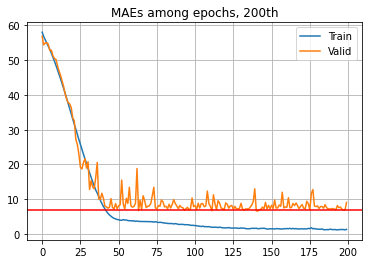

In [11]:
plt.title(f"MAEs among epochs, {e+1}th")
plt.plot(trn_maes, label='Train')
plt.plot(tst_maes, label='Valid')
plt.axhline(y=7, color='r', linestyle='-')
plt.grid()
plt.legend()

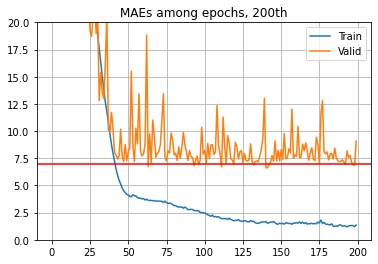

In [12]:
plt.title(f"MAEs among epochs, {e+1}th")
plt.plot(trn_maes, label='Train')
plt.plot(tst_maes, label='Valid')
plt.axhline(y=7, color='r', linestyle='-')
plt.ylim(0, 20)
plt.grid()
plt.legend()

### Ensemble Train

In [9]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x

In [10]:
class CFG:
    
    model_name='resnet'
    dropout=0.1
    use_last_layer=True

In [49]:
class Ensemble(nn.Module):
    
    def __init__(self, model_list, CFG):
        super(Ensemble, self).__init__()
        
        self.cfg = CFG
        self.dropout = self.cfg.dropout
        self.models = dict()
        
        for idx, model_path in enumerate(model_list):
            
            model, device = load_model(self.cfg.model_name, verbose=False)
            model = torch.load(model_path)
            if not self.cfg.use_last_layer:
                model.fc = Identity()
                
                self.last_layer = nn.Sequential(
                    nn.Linear(len(model_list) * 128, 128),
                    nn.Dropout(self.dropout),
                    nn.Linear(128, 1)
#                     nn.Dropout(self.dropout)
                )
                
            else:
                self.last_layer = nn.Sequential(
                    nn.Linear(len(model_list), 1),
#                     nn.Dropout(self.dropout)
                )
                
            for param in model.parameters():
                param.requires_grad = False
                
            self.models[idx] = model
        
    def forward(self, x):
        
        vectors = list()
        for idx, model in self.models.items():
            vectors.append(model(x))
            
        x = torch.cat(vectors, dim=1)
        x = self.last_layer(x)
        
        return x

In [52]:
model_list = glob('./models/ensembles/rough/*.pth')
model_list.sort()
cfg = CFG()
cfg.use_last_layer = False
model = Ensemble(model_list, cfg).to(device)
with torch.no_grad():
    model.last_layer[0].weight.fill_(1 / len(model_list))
optimizer = optim.Adam(model.parameters(), lr=1e-4)

Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.


In [ ]:
trn_losses, val_losses = [], []
trn_maes, val_maes = [], []
trn_rmses, val_rmses = [], []

fold = None
best_mae = 10
for e in range(10):
    
    model, (trn_losses, trn_maes, trn_rmses), trn_preds = train(model, False, None, fold, resize, device, batch_size,
                                                                loss_fn, mae_fn, rmse_fn,
                                                                trn_losses, trn_maes, trn_rmses,
                                                                optimizer, scheduler, lamb)
    
    model, (val_losses, val_maes, val_rmses), val_preds =  eval(model, True, None, fold, resize, device, batch_size,
                                                          loss_fn, mae_fn, rmse_fn,
                                                          val_losses, val_maes, val_rmses)
    
    
    # SUM UP RESLUTS
    trn_df = make_df(trn_preds, 'train')
    val_df = make_df(val_preds, 'valid')
    reg_df = pd.concat([trn_df, val_df], ignore_index=True)

    trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
    val_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']


    print(f'EPOCHS {e+1} / {epochs.stop}')
    print(f'BEST MAE {best_mae:.3f}')
    print(f'MAE  :: [TRAIN] {trn_maes[-1]:.3f}   | [VALID] {val_maes[-1]:.3f}')
    if e % 5 == 0:
        print(f'MSE  :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {val_losses[-1]:.3f}')
        print(f'RMSE :: [TRAIN] {trn_rmses[-1]:.3f}  | [VALID] {val_rmses[-1]:.3f}')
        print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {val_corr:.3f}\n')

    if e % 10 == 9:
        plt.title(f"L1 Losses among epochs, {e}th")
        plt.plot(trn_losses, label='Train')
        plt.plot(val_losses, label='Valid')
        plt.grid(); plt.legend()

        sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
        plt.grid()
        plt.show()

EPOCHS 1 / 100
BEST MAE 10.000
MAE  :: [TRAIN] 34.852   | [VALID] 7.090
MSE  :: [TRAIN] 1986.937 | [VALID] 75.023
RMSE :: [TRAIN] 41.735  | [VALID] 8.615
CORR :: [TRAIN] 0.535 | [VALID] 0.854

EPOCHS 2 / 100
BEST MAE 10.000
MAE  :: [TRAIN] 22.333   | [VALID] 6.822
EPOCHS 3 / 100
BEST MAE 10.000
MAE  :: [TRAIN] 20.959   | [VALID] 6.864
EPOCHS 4 / 100
BEST MAE 10.000
MAE  :: [TRAIN] 21.085   | [VALID] 6.827


In [ ]:
# torch.save(model, 'model.pth')

In [ ]:
# best_loss = 10

# trn_fold_losses, tst_fold_losses = [], []
# trn_fold_corrs, tst_fold_corrs = [], []

# trn_fold = {
#     'MSE': list(),
#     'MAE': list(),
#     'RMSE': list(),
#     'Correlation': list()
# }

# tst_fold = {
#     'MSE': list(),
#     'MAE': list(),
#     'RMSE': list(),
#     'Correlation': list()
# }

# for fold in folds:
    
#     train_dset = MyDataset(task_type='age', fold=fold)
#     test_dset = MyDataset(task_type='age', test=True, fold=fold)

#     train_loader = DataLoader(train_dset, batch_size=8)
#     test_loader = DataLoader(test_dset, batch_size=8)
    
#     trn_losses, tst_losses = [], []
#     trn_maes, tst_maes = [], []
#     trn_rmses, tst_rmses = [], []
#     for e in epochs:

#         # TRAIN
#         trn_bth_loss, trn_bth_mae, trn_bth_rmse = 0, 0, 0
#         trn_trues, trn_preds = [], []
#         model.train()
#         for i, (x, y) in enumerate(train_loader):

#             if resize:
#                 x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

#             else:
#                 x, y = x.to(device), y.to(device)

#             optimizer.zero_grad()

#             y_pred = model.forward(x).to(device)

#             trn_trues.append(y.to('cpu'))
#             trn_preds.append(y_pred.to('cpu'))

#             # Loss
#             loss = loss_fn(y_pred.squeeze(1), y)
            
#             # Metrics
#             mae = mae_fn(y_pred.squeeze(1), y)
#             rmse = rmse_fn(y_pred.squeeze(1), y)
            
#             del x, y, y_pred

#             loss.backward()
#             optimizer.step()
#             if scheduler: scheduler.step()

#             trn_bth_loss += loss.item()
#             trn_bth_mae  += loss.item()
#             trn_bth_rmse += loss.item()

#         torch.cuda.empty_cache()

#         ### loss
#         trn_losses.append(trn_bth_loss / len(train_loader))
#         trn_maes.append(trn_bth_mae / len(train_loader))
#         trn_rmses.append(trn_bth_rmse / len(train_loader))

#         ### collect trues/predictions
#         trn_trues = list(chain(*trn_trues))
#         trn_preds = list(chain(*trn_preds))

        
#         # VALID
#         tst_bth_loss, tst_bth_mae, tst_bth_rmse = 0, 0, 0
#         model.eval()
#         tst_trues, tst_preds = [], []
#         with torch.no_grad(): # to not give loads on GPU... :(
#             for i, (x, y) in enumerate(test_loader):
#                 if resize:
#                     x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

#                 else:
#                     x, y = x.to(device), y.to(device)

#                 y_pred = model.forward(x).to(device)

#                 tst_trues.append(y.to('cpu'))
#                 tst_preds.append(y_pred.to('cpu'))

#                 # Loss
#                 loss = loss_fn(y_pred.squeeze(1), y)
                
#                 # Metrics
#                 mae = mae_fn(y_pred.squeeze(1), y)
#                 rmse = rmse_fn(y_pred.squeeze(1), y)
                
#                 del x, y, y_pred

#                 tst_bth_loss += loss.item()
#                 tst_bth_mae  += loss.item()
#                 tst_bth_rmse += loss.item()
                
#         torch.cuda.empty_cache()
        
#         ### loss
#         tst_losses.append(tst_bth_loss / len(test_loader))
#         tst_maes.append(tst_bth_mae / len(test_loader))
#         tst_rmses.append(tst_bth_rmse / len(test_loader))

#         ### collect trues/predictions
#         tst_trues = list(chain(*tst_trues))
#         tst_preds = list(chain(*tst_preds))

        
#         # SUM UP RESLUTS
#         reg_df = pd.DataFrame({
#             'True': list(map(float, trn_trues + tst_trues)),
#             'Prediction': list(map(float, trn_preds + tst_preds)),
#             'Label': ['train'] * len(trn_trues) + ['valid'] * len(tst_trues)
#         })

#         trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
#         tst_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

#         if e % 5 == 0:
#             print(f'FOLD {fold} - EPOCHS {e}')
#             print(f'MSE  :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {tst_losses[-1]:.3f}')
#             print(f'MAE  :: [TRAIN] {trn_maes[-1]:.3f}   | [VALID] {tst_maes[-1]:.3f}')
#             print(f'RMSE :: [TRAIN] {trn_rmses[-1]:.3f}  | [VALID] {tst_rmses[-1]:.3f}')
#             print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {tst_corr:.3f}')

#         if e % 10 == 9:
#             plt.title(f"L1 Losses among epochs, {e}th")
#             plt.plot(trn_losses, label='Train')
#             plt.plot(tst_losses, label='Valid')
#             plt.grid(); plt.legend()
            
#             sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
#             plt.grid()
#             plt.show()
    
#     trn_fold['MSE'].append(trn_losses)
#     trn_fold['MAE'].append(trn_maes)
#     trn_fold['RMSE'].append(trn_rmses)
#     trn_fold['Correlation'].append(trn_corr)
    
#     tst_fold['MSE'].append(tst_losses)
#     tst_fold['MAE'].append(tst_maes)
#     tst_fold['RMSE'].append(tst_rmses)
#     tst_fold['Correlation'].append(tst_corr)
    
#     # TEST
#     test_dset = MyDataset(task_type='age', test=True)
#     test_loader = DataLoader(test_dset, batch_size=8)
    
#     tst_bth_loss = 0
#     model.eval()
#     tst_trues, tst_preds = [], []
#     with torch.no_grad(): # to not give loads on GPU... :(
#         for i, (x, y) in enumerate(test_loader):
#             if resize:
#                 x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

#             else:
#                 x, y = x.to(device), y.to(device)

#             y_pred = model.forward(x).to(device)

#             tst_trues.append(y.to('cpu'))
#             tst_preds.append(y_pred.to('cpu'))

#             loss = loss_fn(y_pred.squeeze(1), y)
            
#             mae = mae_fn(y_pred.squeeze(1), y)
#             rmse = rmse_fn(y_pred.squeeze(1), y)
#             del x, y, y_pred

#             tst_bth_loss += loss.item()

#     torch.cuda.empty_cache()
#     ### loss
#     tst_loss = tst_bth_loss / len(test_loader)

#     ### collect trues/predictions
#     tst_trues = list(chain(*tst_trues))
#     tst_preds = list(chain(*tst_preds))
    
#     tst_df = pd.DataFrame({
#         'True': list(map(float, tst_trues)),
#         'Prediction': list(map(float, tst_preds)),
#         'Label': ['test'] * len(tst_trues)
#     })
#     reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

#     tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
#     print(f'FOLD {fold}', end='')
#     print(f'RMSE :: [TEST] {tst_loss:.3f}')
#     print(f'CORR :: [TEST] {tst_corr:.3f}')

#     sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
#     plt.grid()
#     plt.show()